# Clusterização

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Aquisição de dados

In [2]:
dataset = pd.read_csv('iris_flower.csv')
dataset

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
X = dataset.iloc[:, [2, 3]].values
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

## 1. Considerando as colunas 'petal_length' e 'petal_width', gerar a curva cotovelo e definir o número ideal de clusters (K), conforme tal curva;

550.6434666666668
86.40394533571005
31.387758974358974
19.499400899685114
14.084349656750573
11.07941480094615
9.514800341130604
8.27823823689659
6.8327306680247855


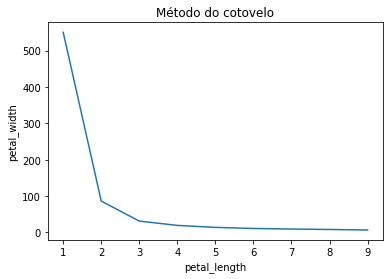

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Método do cotovelo')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

#### Treinamento do modelo e Visualização dos clusters

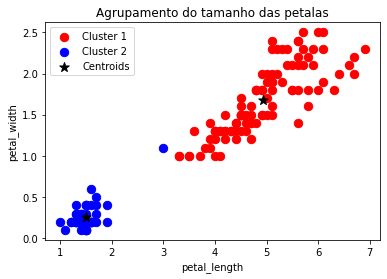

In [10]:
kmeans= KMeans(n_clusters = 2, init = 'random', n_init=100)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label ='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = 'black', label = 'Centroids')
plt.title('Agrupamento do tamanho das petalas')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

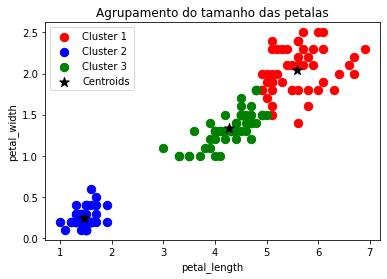

In [11]:
kmeans= KMeans(n_clusters = 3, init = 'random', n_init=100)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = 'black', label = 'Centroids')
plt.title('Agrupamento do tamanho das petalas')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

## 2. Inicializar os centróides usando diferentes valores de tentativa randômica e o kmeans++. Em seguida, imprima os valores dos centróides;

[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


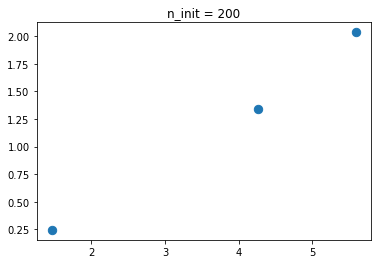

[[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]


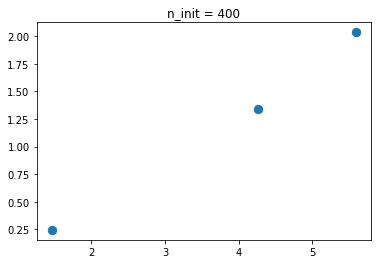

[[5.59583333 2.0375    ]
 [4.26923077 1.34230769]
 [1.464      0.244     ]]


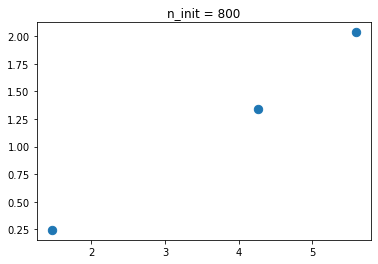

[[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]


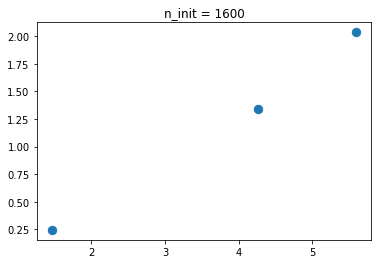

In [27]:
from sklearn.cluster import KMeans
for i in range(1, 5):
    kmeans = KMeans(n_clusters = 3, init = 'random', n_init=100*2**i)
    kmeans.fit(X)
    #print(kmeans.inertia_)
    print(kmeans.cluster_centers_)
    plt.title(f'n_init = {100*2**i}')
    plt.scatter(list(map(lambda x: x[0], kmeans.cluster_centers_)), list(map(lambda x: x[1], kmeans.cluster_centers_)), s = 70)
    plt.show()

[[4.26923077 1.34230769]
 [5.59583333 2.0375    ]
 [1.464      0.244     ]]


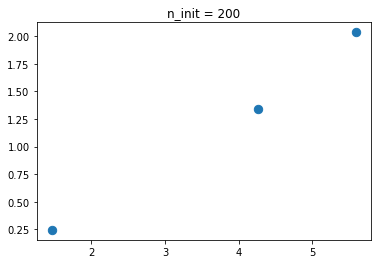

[[5.59583333 2.0375    ]
 [1.464      0.244     ]
 [4.26923077 1.34230769]]


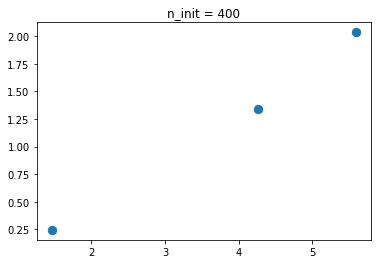

[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


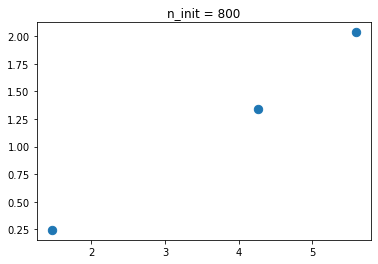

[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


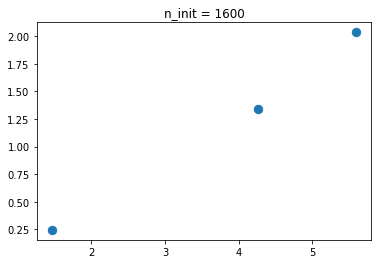

In [30]:
for i in range(1, 5):
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init=100*2**i)
    kmeans.fit(X)
    #print(kmeans.inertia_)
    plt.title(f'n_init = {100*2**i}')
    print(kmeans.cluster_centers_)
    plt.scatter(list(map(lambda x: x[0], kmeans.cluster_centers_)), list(map(lambda x: x[1], kmeans.cluster_centers_)), s = 70)
    plt.show()


## 3. Mostrar os gráfico dos clusters e seus respectivos centróides para cada técnica de inicialização dos centróides.

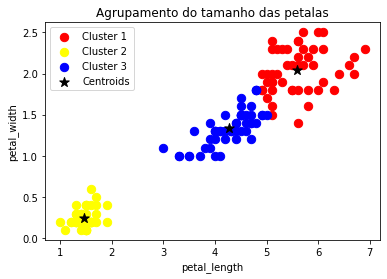

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'blue', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 70, c = 'green', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 70, c = 'gray', label = 'Cluster 5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 70, c = '#FF00FF', label = 'Cluster 6')
# plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 70, c = 'orange', label = 'Cluster 7')
# plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 70, c = 'brown', label = 'Cluster 8')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = 'black', label = 'Centroids')
plt.title('Agrupamento do tamanho das petalas')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

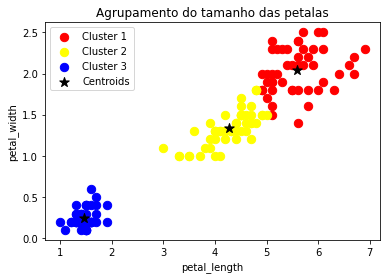

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init = 'random',random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'blue', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 70, c = 'green', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 70, c = 'gray', label = 'Cluster 5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 70, c = '#FF00FF', label = 'Cluster 6')
# plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 70, c = 'orange', label = 'Cluster 7')
# plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 70, c = 'brown', label = 'Cluster 8')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = 'black', label = 'Centroids')
plt.title('Agrupamento do tamanho das petalas')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()